In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

%matplotlib inline

The problem statement proposed by the Kaggle dataset is to predict whether previously ordered elements will be reordered in the user's latest cart.

My ambition is to create a dynamic shopping cart recommendation system for deployment in the Instacart shopping interface.

The cart-"completer" panel in this system would offer a limited set of recommendations (~5) in a visible panel. Those recommendations would ideally be updated as the user fills out their cart.

At the moment, __I'm trying to optimize precision__. I want the highest percentage of products I recommend to be ones that are actually ordered by the user.

Down the line, I hope to rank the probabilities of products, adjust the recommendation threshold, and display a window with 5-10 of the most likely products.

### features

Currently I've included the following features into my model. I've passed these features to KNN, 

target = 'reordered'

features:

`'user_id',` # Maybe the user_id is still useful to the classifier? In case there are outlier users?

`'product_id', 'aisle_id', 'department_id',` ### IDs specific to the product we're predicting

`'prev_order_ct', 'dept_visits', 'aisle_visits', 'avg_order_size',` ### User Metrics

`'prod_hod_mean', 'prod_hod_var',` ### Average Time of Day for specific user-product

`'order_number', 'order_dow', 'order_hour_of_day',` ### Order information ("When is the user logging in?")

`'days_since_prior_order'`, ### User Information

`'prod_hod_delta', 'prod_hod_delta_w'` ### Interaction of Log in time and Average product order time

# Model Performance, Baseline, Random Forest, and XGB

Parameters for these specific models have not been optimized.

The Baseline model predicts `reordered = 0` for every record.


In [44]:
scores = (
    [
    ['model', 'train_precision', 'train_f1', 'val_precision', 'val_f1_score'],
    ['Baseline, predict 0', 0.06463622731268422, 0.12142406139200546, 0.06421591437878083, 0.12068211630957586],
    ['RF, 1000 est, depth 8', 1.0, 0.0392156862745098, 0.5, 0.009569377990430622],
    ['XGB, 1000 est, depth 4', 0.9663865546218487, 0.5330243337195828, 0.5096153846153846, 0.20463320463320467],
    ['XGB, 1000 est, depth 6', 0.9990049751243781, 0.8904656319290466, 0.4453125, 0.21033210332103322]
]
)

scores_df = pd.DataFrame(scores[1:],columns = scores[0]).set_index('model')
# data = pd.DataFrame(scores[1:],columns = scores[0])
scores_df;

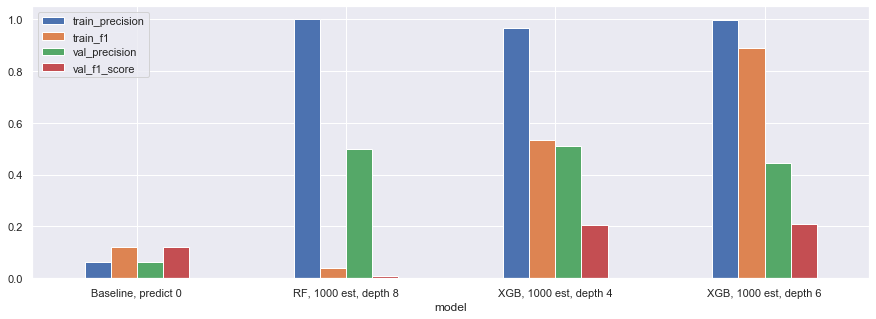

In [45]:
fig, ax = plt.subplots(figsize=(15,5))

data.plot(kind='bar', ax=ax)

plt.xticks(rotation=0);